In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('review_dataset_v2.csv')

## Column Types

* Numerical - review , rating, date, sentiment score, sentiment magnitude, confident
* Categorical - company , country, review class, deletected lang, category
* Mixed - name , topic, content, positive class, negative class

## Univariate Analysis

### Numerical Column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1456 non-null   object 
 1   review               1456 non-null   float64
 2   rating               1456 non-null   int64  
 3   company              1456 non-null   object 
 4   country              1456 non-null   object 
 5   date                 1456 non-null   object 
 6   topic                1456 non-null   object 
 7   content              1456 non-null   object 
 8   sentiment_score      1456 non-null   float64
 9   sentiment_magnitude  1456 non-null   float64
 10  entities             1456 non-null   object 
 11  review_class         1456 non-null   object 
 12  positive_reasons     1456 non-null   object 
 13  negative_reasons     1456 non-null   object 
 14  detected_language    1456 non-null   object 
 15  category             700 non-null    o

In [4]:
df.describe()

,review,rating,sentiment_score,sentiment_magnitude,confidence
count,1456.000000,1456.000000,1456.000000,1456.000000,681.000000
mean,5.976648,1.940247,-0.392514,0.780769,0.692291
std,13.457001,1.597636,0.620247,0.280502,0.142589
min,1.000000,1.000000,-0.900000,0.000000,0.500000
25%,1.000000,1.000000,-0.800000,0.700000,0.560000
50%,2.000000,1.000000,-0.700000,0.700000,0.670000
75%,5.000000,2.000000,-0.500000,0.800000,0.810000
max,172.000000,5.000000,0.900000,4.000000,0.990000


#### Review

* Conclusion
    1. This data is is highly skew 
    2. Most people gave around 1 to 5 review. more then half of them are those who gave 2 review.
    3. Too many outlines are in data but still need to keep them and no need to change that

In [5]:
df['review'].describe()

count    1456.000000
mean        5.976648
std        13.457001
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       172.000000
Name: review, dtype: float64

In [6]:
df[df.duplicated()]

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence


In [7]:
df[df['review'] > 50].count()

name                   23
review                 23
rating                 23
company                23
country                23
date                   23
topic                  23
content                23
sentiment_score        23
sentiment_magnitude    23
entities               23
review_class           23
positive_reasons       23
negative_reasons       23
detected_language      23
category               16
confidence             15
dtype: int64

<Axes: xlabel='review', ylabel='Count'>

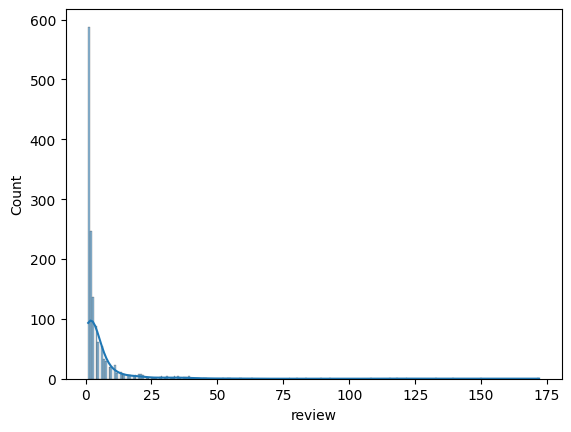

In [8]:
sns.histplot(df['review'], kde=True)

<Axes: ylabel='Frequency'>

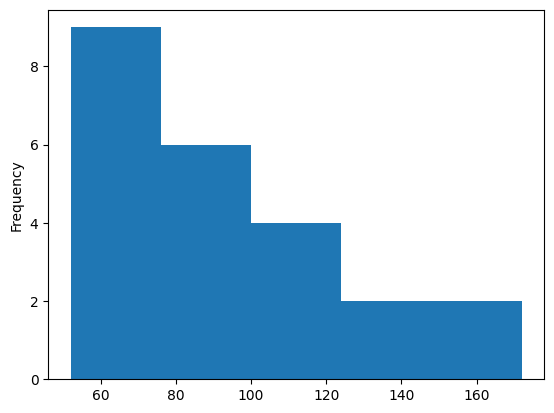

In [9]:
df[df['review'] > 50]['review'].plot(kind='hist', bins=5)

<Axes: ylabel='Density'>

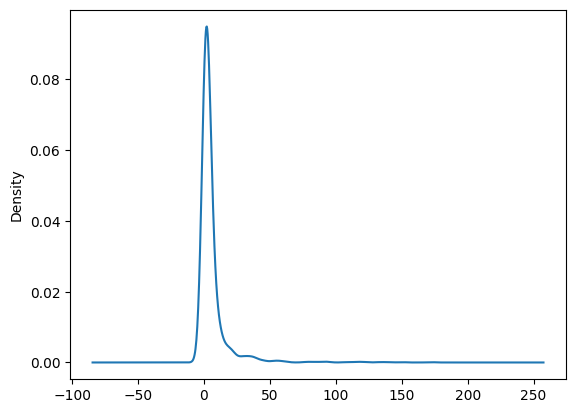

In [10]:
df['review'].plot(kind='kde')

In [11]:
df['review'].skew()

np.float64(6.449684920728695)

<Axes: >

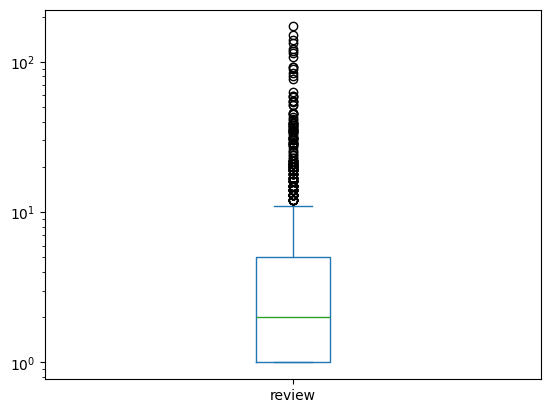

In [12]:
df['review'].plot(kind='box', logy=True)

In [13]:
print(df.review.min())
print(df.review.max())
print(df.review.quantile(.25))
print(df.review.quantile(.50))
print(df.review.quantile(.75))
print(df.review.mean())
print(df.review.median())
print(df.review.mode().values[0])

1.0
172.0
1.0
2.0
5.0
5.976648351648351
2.0
1.0


In [14]:
review_std = df['review'].std()

In [15]:
review_mean = df['review'].mean()
review_mean

np.float64(5.976648351648351)

In [16]:
review_std

np.float64(13.457000529852516)

In [17]:
low = review_mean - 3 * review_std
low

np.float64(-34.3943532379092)

In [18]:
high = review_mean + 3*review_std
high

np.float64(46.3476499412059)

In [19]:
tempdf = df[(df['review'] < low) | (df['review'] > high)]
tempdf.head()

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence
26,p fisher,93.0,1,amazon,united kingdom,2024-10-01 18:51:01,criminal behaviour,i told amazon to cancel an order the driver st...,-0.7,0.7,"neighbours, driver, amazon, order, money, refu...",negative,no_positive,i told amazon to cancel an order the driver st...,en,NaN,NaN
81,stephen n.,59.0,1,amazon,united kingdom,2024-10-01 10:32:11,80 minutes wasted on their customer services,i had an offer as a loyal customer to get grea...,-0.7,0.7,"benefits, customer, barclaycard, offer, one, q...",negative,no_positive,i had an offer as a loyal customer to get grea...,en,finance,0.67
83,joanne collins,54.0,1,amazon,united kingdom,2024-10-01 07:38:38,still no account,well i left it for a week hoping my amazon acc...,-0.8,0.8,"account, amazon, telephone number, telephone n...",negative,no_positive,well i left it for a week hoping my amazon acc...,en,NaN,NaN
123,dmac,77.0,1,amazon,united kingdom,2024-10-01 03:50:34,prime big deal what do you take me for,come on amazon treat me seriously a ceiling s...,0.2,0.2,"deal, amazon, ceiling spotlight, sale, bargain...",positive,come on amazon treat me seriously a ceiling s...,no_negative,en,home & garden',0.76
130,ian wooller,122.0,1,amazon,united kingdom,2024-10-01 09:18:33,cancelled order,they cancelled an order that was going to be d...,-0.8,0.8,"order, customer, anything, reason",negative,no_positive,they cancelled an order that was going to be d...,en,arts & entertainment',0.55


In [20]:
df['review'].skew()

np.float64(6.449684920728695)

In [21]:
df['review'].kurtosis()

np.float64(53.946585552372824)

In [22]:
df['review_log'] = np.log1p(df['review'])


In [23]:
df['review_sqrt'] = np.sqrt(df['review'])


In [24]:
from scipy import stats
df['review_boxcox'], lam = stats.boxcox(df['review'] + 1e-6)


In [25]:
from scipy import stats
stat, p_value = stats.shapiro(df['review_sqrt'].dropna())  
print('Shapiro-Wilk Test p-value:', p_value)

Shapiro-Wilk Test p-value: 2.6034417937400104e-47


In [26]:
df.head()

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence,review_log,review_sqrt,review_boxcox
0,vladimiro mascaro,3.0,1,amazon,united kingdom,2024-10-01 18:25:37,4 months of total incopetence,since july until this month of all my orders 8...,-0.6,0.6,"orders, orders, thing, direct debit, headphone...",negative,no_positive,since july until this month of all my orders 8...,en,shopping',0.62,1.386294,1.732051,8.326414e-01
1,lucy loo,9.0,1,amazon,united kingdom,2024-10-01 09:57:32,driver stealing,as a family we order from amazon almost daily ...,-0.8,0.8,"amazon, family, change, one, nothing, packages...",negative,no_positive,as a family we order from amazon almost daily ...,en,NaN,NaN,2.302585,3.000000,1.297622e+00
2,da,21.0,5,amazon,united kingdom,2024-10-01 11:36:09,where is the negativity coming from,probably the only store that 1 delivers ontime...,0.1,0.1,"store, customers, prices, competitors, valuefo...",positive,probably the only store that 1 delivers ontime...,no_negative,en,NaN,NaN,3.091042,4.582576,1.510468e+00
3,vicki study,1.0,1,amazon,united kingdom,2024-10-01 15:36:33,absolutely appalling customer service,the customer service has been absolutely appal...,-0.7,0.7,"customer service, calls, ive, fault, issue, am...",negative,no_positive,the customer service has been absolutely appal...,en,NaN,NaN,0.693147,1.000000,9.999992e-07
4,jeffrey bruce,5.0,1,amazon,united kingdom,2024-10-01 17:09:02,amazon are quick enough to take payment,amazon are quick enough to take payment for or...,-0.7,0.7,"amazon, payment, orders, worst, claim, custome...",negative,no_positive,amazon are quick enough to take payment for or...,en,shopping',0.62,1.791759,2.236068,1.082533e+00


### Rating

`Conclusion`

1. Most people gives a negative rating of 1 and almost 1/4 of that number people gives a 5 star rating.

In [27]:
df['rating'].value_counts()

rating
1    1031
5     279
2      74
3      37
4      35
Name: count, dtype: int64

<Axes: ylabel='count'>

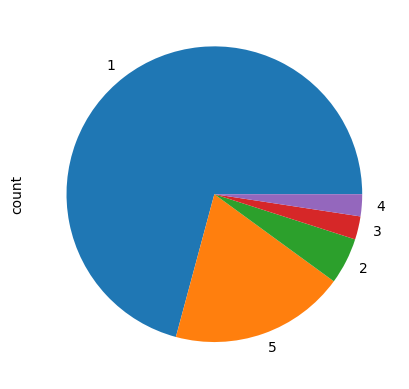

In [28]:
df['rating'].value_counts().plot(kind='pie')

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 1456 non-null   object        
 1   review               1456 non-null   float64       
 2   rating               1456 non-null   int64         
 3   company              1456 non-null   object        
 4   country              1456 non-null   object        
 5   date                 1456 non-null   datetime64[ns]
 6   topic                1456 non-null   object        
 7   content              1456 non-null   object        
 8   sentiment_score      1456 non-null   float64       
 9   sentiment_magnitude  1456 non-null   float64       
 10  entities             1456 non-null   object        
 11  review_class         1456 non-null   object        
 12  positive_reasons     1456 non-null   object        
 13  negative_reasons     1456 non-nul

### Sentiment Analysis

`Conclusion`

1. From the sentiment analysis we can say that most of the peopel's review contain negative sentiment.
3. Almost 3/4 peopel's review has highly negative reviews.
3. Data is spread is low so all the data is near to mean value wiht fewer value in tail.
4. Most peaople's review shows that the given review are weakely positive or negative 
5. sentiment magnitude data is highly skewed
6. Confidence data is bimonal data and its little bit negatively skewed
7. Confidence row data spread is close to mean value.
8. Confidence data is not too much skew, std is near to 0 and because of that we are using mean value to repalce Nan in Confidence data

In [31]:
df['sentiment_score'].value_counts()

sentiment_score
-0.7    552
-0.8    385
 0.9    199
-0.6    127
 0.8     47
-0.5     27
-0.4     21
-0.3     18
 0.1     10
 0.7     10
 0.6      9
-0.9      9
-0.2      9
 0.3      8
 0.0      7
-0.1      6
 0.2      4
 0.4      4
 0.5      4
Name: count, dtype: int64

In [32]:
df['sentiment_score'].describe()

count    1456.000000
mean       -0.392514
std         0.620247
min        -0.900000
25%        -0.800000
50%        -0.700000
75%        -0.500000
max         0.900000
Name: sentiment_score, dtype: float64

<Axes: xlabel='sentiment_score', ylabel='Count'>

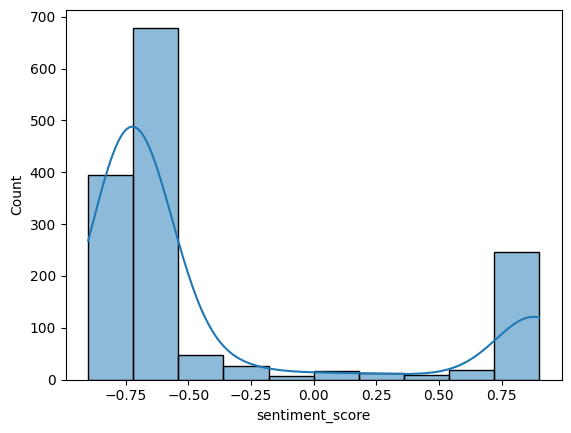

In [33]:
sns.histplot(x=df['sentiment_score'], kde=True, bins=10)

In [34]:
df['sentiment_score'].skew()

np.float64(1.4333981024968374)

In [35]:
df['sentiment_score'].kurtosis()

np.float64(0.24421949556637923)

In [36]:
df['sentiment_magnitude'].describe()

count    1456.000000
mean        0.780769
std         0.280502
min         0.000000
25%         0.700000
50%         0.700000
75%         0.800000
max         4.000000
Name: sentiment_magnitude, dtype: float64

In [37]:
df['sentiment_magnitude'].value_counts()

sentiment_magnitude
0.7    512
0.8    414
0.9    211
0.6    124
0.5     31
1.5     24
0.3     21
1.6     20
0.4     18
0.1     17
1.4     17
0.2     11
1.2      6
1.3      6
2.3      5
0.0      4
2.2      3
2.1      3
1.7      2
2.5      2
1.0      2
2.4      1
4.0      1
2.0      1
Name: count, dtype: int64

<Axes: xlabel='sentiment_magnitude', ylabel='Count'>

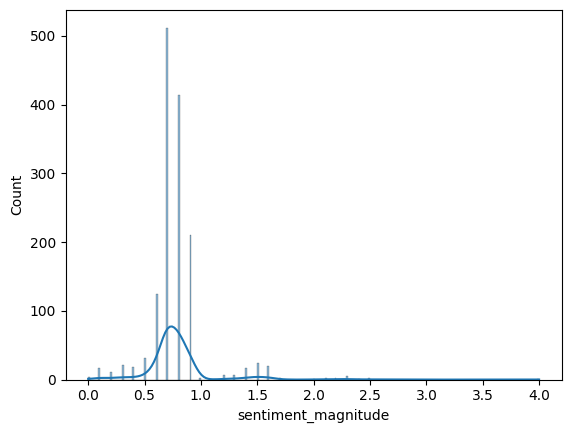

In [38]:
sns.histplot(x=df['sentiment_magnitude'], kde=True)

<Axes: >

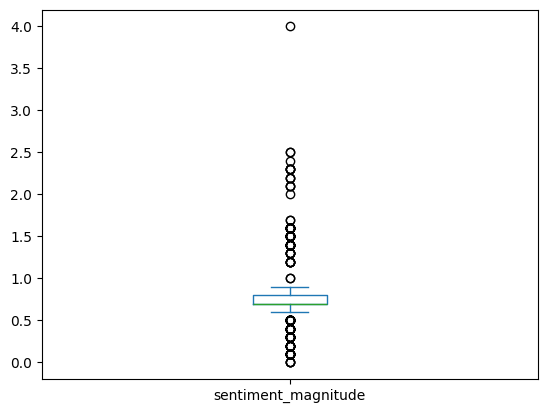

In [39]:
df['sentiment_magnitude'].plot(kind='box')

In [40]:
df[(df['sentiment_magnitude'] > 1.2) | (df['sentiment_magnitude'] < 0.5)].count()

name                   162
review                 162
rating                 162
company                162
country                162
date                   162
topic                  162
content                162
sentiment_score        162
sentiment_magnitude    162
entities               162
review_class           162
positive_reasons       162
negative_reasons       162
detected_language      162
category                89
confidence              86
review_log             162
review_sqrt            162
review_boxcox          162
dtype: int64

In [41]:
df['sentiment_magnitude'].skew()

np.float64(2.9724472060588356)

In [42]:
tempdf = df[df['confidence'].isnull()]

In [43]:
df['confidence'].describe()

count    681.000000
mean       0.692291
std        0.142589
min        0.500000
25%        0.560000
50%        0.670000
75%        0.810000
max        0.990000
Name: confidence, dtype: float64

<Axes: xlabel='confidence', ylabel='Count'>

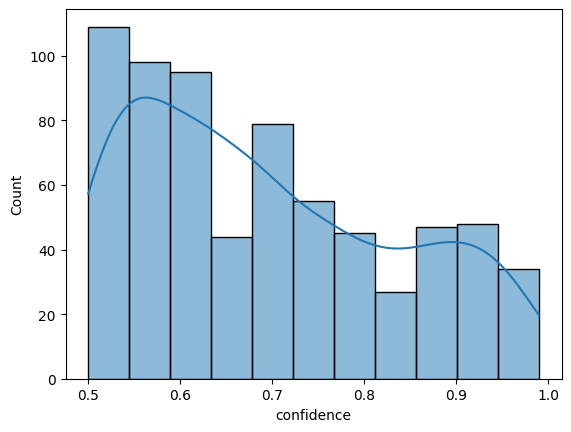

In [44]:
sns.histplot(x=df['confidence'], kde=True)

<Axes: xlabel='confidence'>

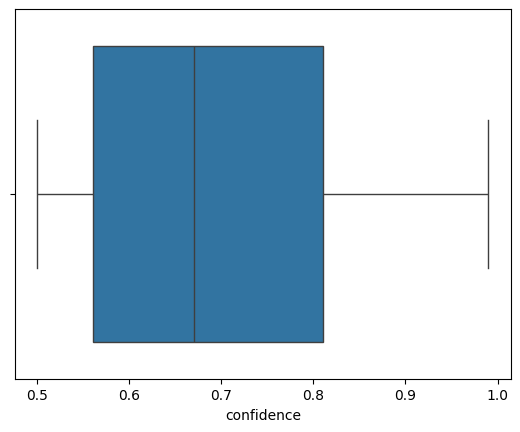

In [45]:
sns.boxplot(x=df['confidence'])

In [46]:
df['confidence'].skew()

np.float64(0.4642324298820364)

In [47]:
df['confidence'].kurtosis()

np.float64(-0.9728547227929729)

In [48]:
df['confidence'].std()

np.float64(0.14258860213358188)

In [49]:
df['confidence'].describe()

count    681.000000
mean       0.692291
std        0.142589
min        0.500000
25%        0.560000
50%        0.670000
75%        0.810000
max        0.990000
Name: confidence, dtype: float64

In [50]:
mean = df['confidence'].mean()
mean_rounded = round(mean, 2)
mean_rounded

np.float64(0.69)

In [51]:
df['confidence'].mode()[0]

np.float64(0.56)

In [52]:
df.loc[tempdf.index, 'confidence'] = mean_rounded

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 1456 non-null   object        
 1   review               1456 non-null   float64       
 2   rating               1456 non-null   int64         
 3   company              1456 non-null   object        
 4   country              1456 non-null   object        
 5   date                 1456 non-null   datetime64[ns]
 6   topic                1456 non-null   object        
 7   content              1456 non-null   object        
 8   sentiment_score      1456 non-null   float64       
 9   sentiment_magnitude  1456 non-null   float64       
 10  entities             1456 non-null   object        
 11  review_class         1456 non-null   object        
 12  positive_reasons     1456 non-null   object        
 13  negative_reasons     1456 non-nul

### Categorical Column

`Conclusion`
1. All the companies have almost same number of review in dataset except alibaba
2. Most reviewer are from the US which is follwed by UK and Canada.
3. Amost 79% reviews are negative and other 21% are positive reviews.
4. Most review are related to shopping, then computer and electronics, then business industrial, home and garden.
5. All the countries companies has the more negative review than positive
6. Category with most negative reviews are Shopping, business and industrial , computer & electronics, arts & entertainment,finance
7. 

In [54]:
df['company'].value_counts()

company
bestbuy    299
ebay       297
walmart    296
amazon     295
alibaba    269
Name: count, dtype: int64

<Axes: ylabel='count'>

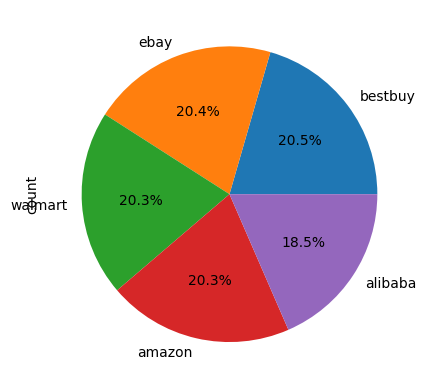

In [55]:
df['company'].value_counts().plot(kind='pie',  autopct='%0.1f%%')

In [56]:
df['country'].value_counts().head()

country
united states     863
united kingdom    239
canada            110
australia          25
denmark            15
Name: count, dtype: int64

<Axes: xlabel='country'>

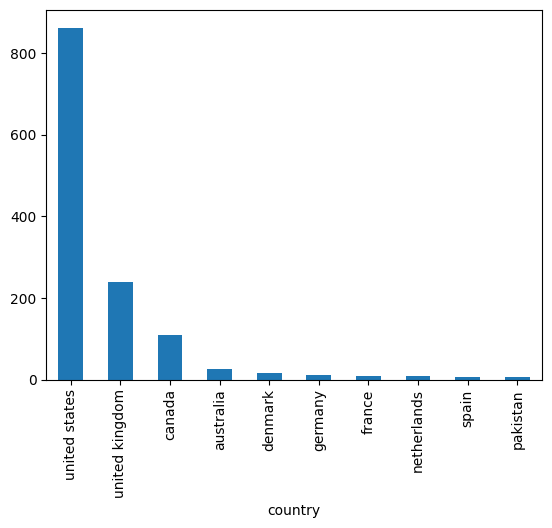

In [57]:
df['country'].value_counts().head(10).plot(kind='bar')

In [58]:
df['review_class'].value_counts()

review_class
negative    1154
positive     302
Name: count, dtype: int64

<Axes: ylabel='count'>

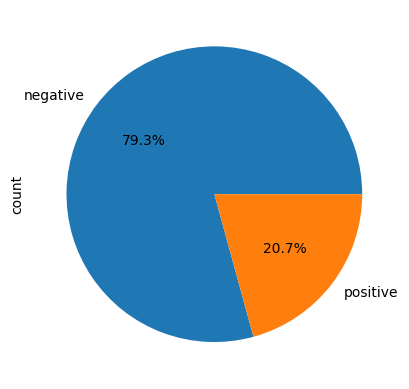

In [59]:
df['review_class'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [60]:
df['category'].value_counts()

category
shopping'                   136
shopping                    126
computers & electronics      58
business & industrial'       45
home & garden                38
business & industrial        35
home & garden'               26
arts & entertainment'        25
computers & electronics'     25
autos & vehicles             21
finance                      19
finance'                     17
arts & entertainment         16
food & drink                 15
internet & telecom'          12
internet & telecom           11
autos & vehicles'            10
hobbies & leisure             9
law & government              7
food & drink'                 7
health                        6
hobbies & leisure'            6
sports                        5
people & society              4
beauty & fitness              3
games'                        3
sports'                       3
people & society'             3
travel'                       2
sensitive subjects'           2
real estate'                  1

In [61]:
df['category'] = df['category'].str.replace(r"'\s*$", '', regex=True)


<Axes: xlabel='category'>

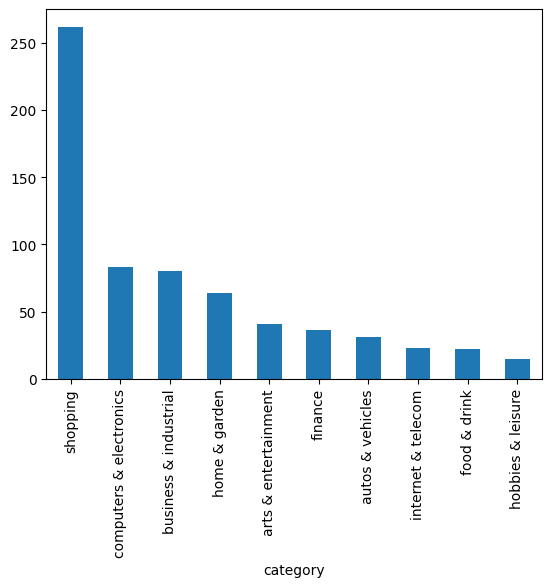

In [62]:
df['category'].value_counts().head(10).plot(kind='bar')

## Bivariate / Multivariate Analysis

#### Conclusion

1. Most review are from USA and UK and most review are about the Amazon and ebay and wallmart
2. Only alibaba has the positive review mroe than negative review all the other company has the more negative review and all those companies has more than 90% negative reviews.
3. Most comapnies has the problem related to shopping and also all the companies has problem in some specific section
    - `Alibaba` : business & indistrual 36.50% , finance : 14 %
    - `Aamazon` : Shopping 41.32% , Business & Indistrual 19.83
    - `Bestbuy` : Computer & Electronics 33.72% , Home and Garden 22.68
    - `Ebay` : Shopping 67.77 % 
    - `walmart` : shopping 38.41% , food & drinks 12.19
4. Most reviewer has given 1 to 5 review. few has given review to 6 to 10. And very least amount of people has given too many reviews.
5. For the rating 
    - `Alibaba` has 74% raitng are 5 stars, 18% ratings are 1 % and 5% rating are 4 starts
    - `Amazon` has 81% 1 stars, 8.47% 5 starts, 4.46% 2 starts rating
    - `Bestbuy` has 84% 1 stars, 6.68% 5 stars, 5.68% 2 starts rating
    - `Ebay` has 91.58% 1 stars, 3.36% 2 stars ratings
    -  `Walmart` has 72.97% 1 stars, 9.45% 2 stars, 8.445% 5 stars rating
6. -  Rating 1: The distribution is wide, indicating a lot of variation, with a high concentration around the middle, meaning there are many occurrences. The density suggests a lot of data points are clustered around the median.
    - Ratings 2, 3, 4: The distributions are much narrower and have less data density compared to rating 1. This suggests fewer occurrences of these ratings or less variability in the data associated with these ratings.
    - Rating 5: The distribution is wider than 2, 3, and 4 but not as wide as rating 1. This suggests a moderate amount of variability and concentration around the middle.
7. - Positive reviews have higher sentiment scores, mostly clustered around 0.75 to 1.0, indicating strong, consistent positive sentiment.
    - Negative reviews have lower sentiment scores, centered around -0.5 to -0.75, showing a clear distinction between positive and negative sentiments.
    - Positive sentiment scores are tightly grouped, with a clear peak, reflecting less variability and strong, consistent positive feedback.Negative reviews display more spread, with some scores closer to neutral (0), suggesting a broader range of sentiments within this class. This might indicate the presence of mixed or neutral sentiments labeled as negative.
8. `Negative Review`:
    - Show high frequencies across various confidence levels, especially at lower and mid-range values. For example, there are 42 reviews at confidence 0.56, 36 reviews at 0.62, and 29 reviews at 0.68.This spread indicates greater variability in classification, suggesting that the classifier encounters a wide range of sentiments when labeling reviews as negative.
    - The wider spread and higher frequencies across lower confidence levels indicate more variability. For instance, there are 32 reviews at 0.50 and 25 reviews at 0.54, showing that the classifier has to deal with a broader range of sentiments.
    `Positive Review`:
    - Have fewer occurrences across most confidence scores but tend to be more concentrated at higher values. For example, there are 231 reviews at confidence 0.69, but only 3 reviews at 0.50 and 1 review at 0.97.This reflects clearer identification and stronger confidence when the classifier labels reviews as positive.
    - Show less variability, with most reviews clustered at specific confidence scores (e.g., 231 reviews at 0.69), indicating more straightforward classification and higher confidence.
9. - Rating 1 is overwhelmingly more frequent across all categories, particularly in Shopping (227) and Computers & Electronics (64), indicating a trend towards lower customer satisfaction or poor experiences.
    - Shopping and Computers & Electronics categories show high variability, with some distribution across higher ratings, while Arts & Entertainment and Finance are concentrated around Rating 1, showing consistently lower ratings.
    - Higher ratings (5) are less frequent but show up more in categories like Business & Industrial (16) and Computers & Electronics (12), indicating some pockets of positive experiences despite the general trend of lower ratings.
10. - `Sunday` stands out as the most active day, showing the highest variability, numerous high and low ratings, and overall higher engagement. It leads both in high counts for Rating 1 (353) and Rating 5 (141), indicating diverse user experiences.
    - `Thursday` and `Tuesday` also see broader distributions and higher average ratings, suggesting active engagement similar to Sunday but at slightly lower levels.`Wednesday` and `Monday` have narrower ranges, indicating more consistent and possibly lower engagement, with Wednesday showing the lowest average ratings.
11. - The data reveals a strong positive association between the rating and sentiment_score. The correlation of 0.92 confirms that the two variables move together, meaning that higher ratings (e.g., 4 or 5) are strongly linked to positive sentiment scores, while lower ratings (e.g., 1 or 2) correlate with neutral or negative sentiments.
    - This result suggests that the sentiment analysis is working effectively, capturing the relationship between user ratings and their sentiment. It provides a clear indication that ratings can be a reliable indicator of overall sentiment, with positive feedback leading to high ratings and negative feedback leading to low ratings.
12. 

### Categorical to Categorical

In [63]:
tempdf = df['country'].value_counts().head(6)
tempdf.index

temp_df = df[df['country'].isin(tempdf.index)]


In [64]:
pd.crosstab(df['company'], temp_df['country'], normalize='columns')

country,australia,canada,denmark,germany,united kingdom,united states
company,,,,,,
alibaba,0.44,0.181818,0.200000,0.500000,0.079498,0.115875
amazon,0.08,0.163636,0.266667,0.333333,0.569038,0.123986
bestbuy,0.08,0.318182,0.000000,0.000000,0.016736,0.292005
ebay,0.40,0.172727,0.466667,0.166667,0.326360,0.159907
walmart,0.00,0.163636,0.066667,0.000000,0.008368,0.308227


<Axes: xlabel='country', ylabel='company'>

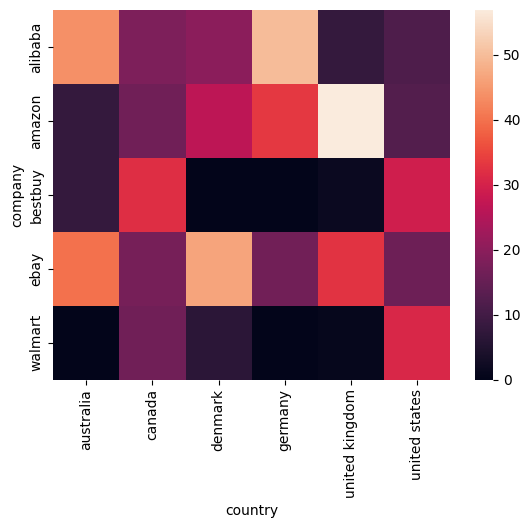

In [65]:
sns.heatmap(pd.crosstab(df['company'], temp_df['country'], normalize='columns' ) *100)

In [66]:
pd.crosstab(df['review_class'],df['company'] , normalize='columns')*100

company,alibaba,amazon,bestbuy,ebay,walmart
review_class,,,,,
negative,23.048327,90.169492,90.9699,96.296296,90.540541
positive,76.951673,9.830508,9.0301,3.703704,9.459459


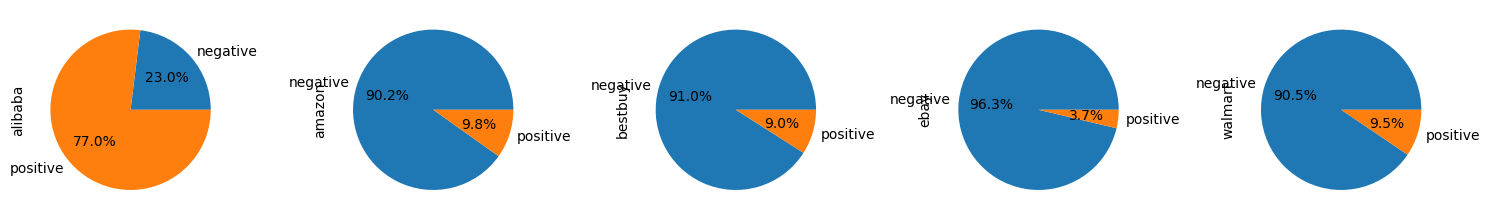

In [67]:
import matplotlib.pyplot as plt

axes = (pd.crosstab(df['review_class'], df['company'], normalize='columns') * 100).plot(
    kind='pie',
    autopct='%0.1f%%',
    subplots=True,
    figsize=(15, 10),  
    legend=False,
          
)

plt.tight_layout()

plt.show()


In [68]:
# import plotly.graph_objects as go

# # Prepare the data
# data = pd.crosstab(df['review_class'], df['company']).reset_index().melt(id_vars=['review_class'])

# # Create a Sunburst chart
# fig = go.Figure(go.Sunburst(
#     labels=data['company'] + ' - ' + data['review_class'],
#     parents=data['company'],
#     values=data['value'],
#     branchvalues='total',
# ))

# fig.update_layout(title='Review Class Distribution by Company', margin=dict(t=50, l=25, r=25, b=25))



In [69]:
pd.crosstab(df['category'], df['company'], normalize='columns')*100

company,alibaba,amazon,bestbuy,ebay,walmart
category,,,,,
arts & entertainment,7.936508,5.785124,6.395349,5.000000,5.487805
autos & vehicles,4.761905,0.826446,3.488372,3.888889,8.536585
beauty & fitness,0.000000,2.479339,0.000000,0.000000,0.000000
business & industrial,36.507937,19.834711,5.813953,5.000000,8.536585
computers & electronics,9.523810,6.611570,33.720930,2.777778,3.658537
finance,14.285714,4.958678,4.069767,5.555556,2.439024
food & drink,0.000000,0.826446,0.581395,0.000000,12.195122
games,0.000000,0.826446,0.581395,0.000000,1.219512
health,0.000000,0.826446,0.000000,1.111111,1.829268


<Axes: xlabel='country'>

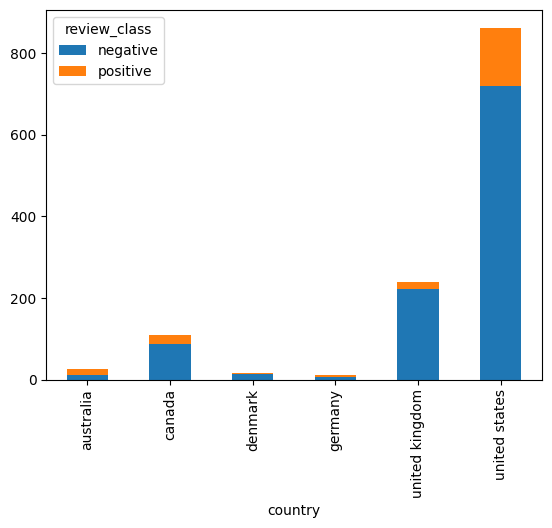

In [70]:
pd.crosstab(temp_df['country'], df['review_class']).plot(kind='bar', stacked=True)

In [71]:
pd.crosstab(df['review_class'], df['category'])

category,arts & entertainment,autos & vehicles,beauty & fitness,business & industrial,computers & electronics,finance,food & drink,games,health,hobbies & leisure,...,internet & telecom,jobs & education,law & government,news,people & society,real estate,sensitive subjects,shopping,sports,travel
review_class,,,,,,,,,,,,,,,,,,,,,
negative,38,28,3,64,70,33,22,3,6,12,...,19,1,8,1,6,1,2,244,6,2
positive,3,3,0,16,13,3,0,1,0,3,...,4,0,0,0,1,0,0,18,2,0


<Axes: xlabel='category', ylabel='review_class'>

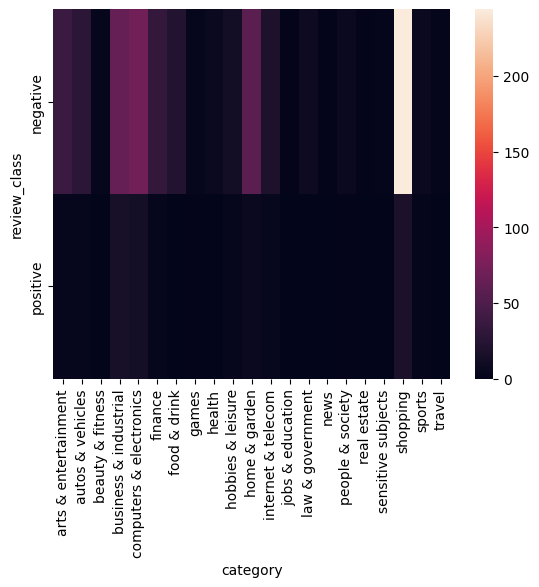

In [72]:
sns.heatmap(pd.crosstab(df['review_class'], df['category']))

### Categorial to Numerical

In [73]:
pd.crosstab(df['company'], df['review'])

review,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,89.0,93.0,108.0,115.0,118.0,122.0,133.0,139.0,150.0,172.0
company,,,,,,,,,,,,,,,,,,,,,
alibaba,158,36,25,10,8,4,4,9,3,1,...,0,0,0,0,0,0,0,0,0,0
amazon,71,63,22,15,11,11,10,6,8,7,...,0,1,0,0,0,1,0,0,0,1
bestbuy,139,51,33,21,14,12,5,7,4,1,...,0,0,0,0,1,0,0,0,0,0
ebay,93,44,23,25,15,17,6,4,2,7,...,1,1,1,1,0,0,1,1,1,0
walmart,127,53,33,17,14,10,8,4,3,4,...,0,0,0,0,0,0,0,0,0,0


In [74]:
pd.crosstab(df['company'], df['rating'], normalize='index')*100

rating,1,2,3,4,5
company,,,,,
alibaba,18.215613,1.486989,1.115242,4.460967,74.721190
amazon,81.694915,5.084746,2.372881,2.372881,8.474576
bestbuy,84.615385,5.685619,1.672241,1.337793,6.688963
ebay,91.582492,3.367003,2.020202,0.336700,2.693603
walmart,72.972973,9.459459,5.405405,3.716216,8.445946


<Axes: xlabel='rating', ylabel='company'>

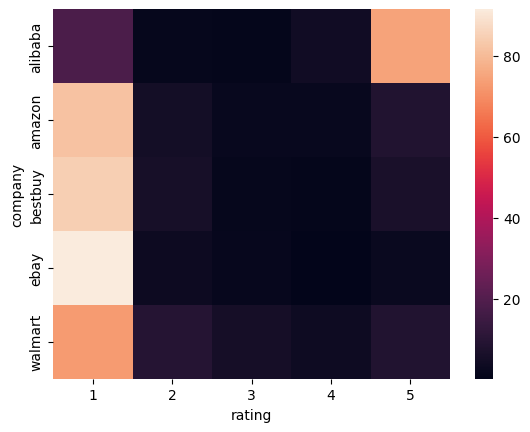

In [75]:
sns.heatmap(pd.crosstab(df['company'], df['rating'], normalize='index')*100)

array([<Axes: ylabel='1'>, <Axes: ylabel='2'>, <Axes: ylabel='3'>,
       <Axes: ylabel='4'>, <Axes: ylabel='5'>], dtype=object)

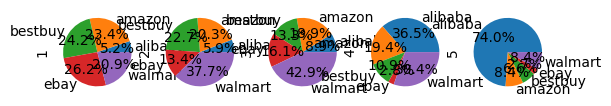

In [76]:
(pd.crosstab(df['company'], df['rating'], normalize='index')*100).plot(kind='pie', subplots=True,autopct='%0.1f%%', legend=False )

In [77]:
pd.crosstab(df['review_class'], df['rating'])

rating,1,2,3,4,5
review_class,,,,,
negative,1022,71,32,15,14
positive,9,3,5,20,265


<Axes: xlabel='rating'>

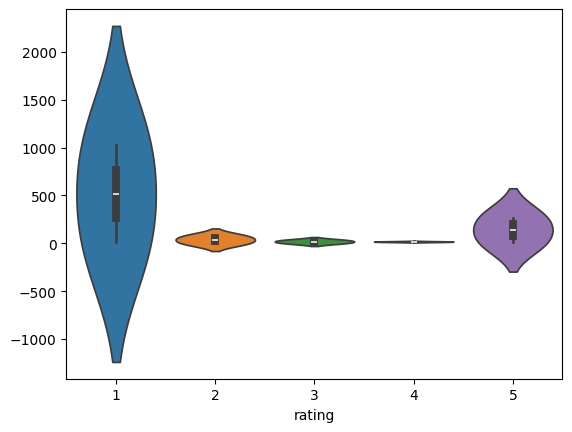

In [78]:
sns.violinplot(pd.crosstab(df['review_class'], df['rating']))

In [79]:
pd.crosstab(df['rating'], df['sentiment_score'])

sentiment_score,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
rating,,,,,,,,,,,,,,,,,,,
1,7,355,505,114,18,13,8,2,0,2,2,2,1,0,0,0,0,2,0
2,1,25,33,7,2,0,1,1,1,1,0,1,0,0,0,0,0,0,1
3,1,5,10,2,4,2,3,3,2,0,1,0,0,1,0,0,1,1,1
4,0,0,2,2,3,4,0,2,2,0,1,0,2,0,0,3,0,10,4
5,0,0,2,2,0,2,6,1,1,4,6,1,5,3,4,6,9,34,193


<Axes: xlabel='sentiment_score'>

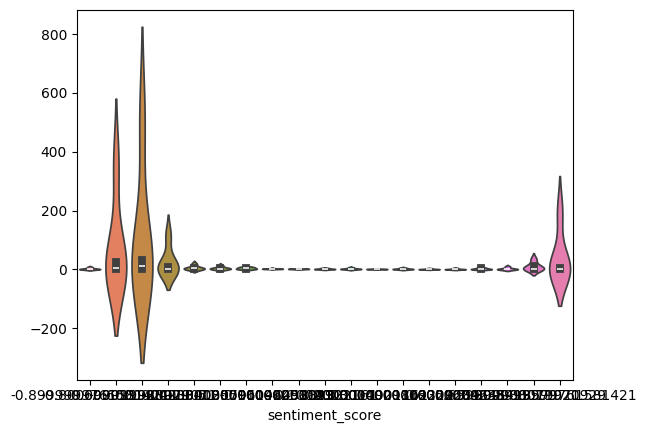

In [80]:
sns.violinplot(pd.crosstab(df['rating'], df['sentiment_score']))

<Axes: xlabel='sentiment_score'>

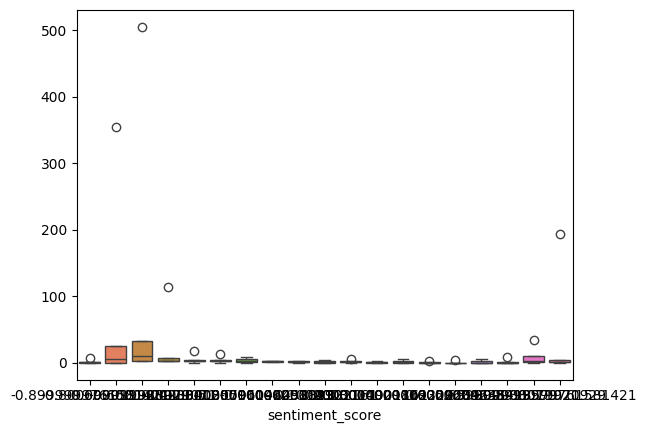

In [81]:
sns.boxplot(pd.crosstab(df['rating'], df['sentiment_score']))

C:\Users\gaura\AppData\Local\Temp\ipykernel_11712\3986000099.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['review_class'] == 'positive']['sentiment_score'], label='Positive', shade=True)
C:\Users\gaura\AppData\Local\Temp\ipykernel_11712\3986000099.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['review_class'] == 'negative']['sentiment_score'], label='Negative', shade=True)


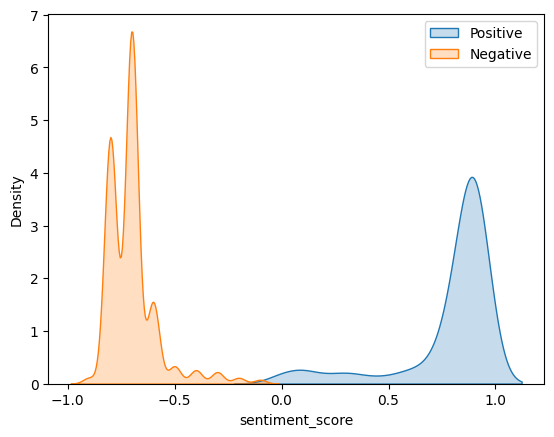

In [82]:
sns.kdeplot(data=df[df['review_class'] == 'positive']['sentiment_score'], label='Positive', shade=True)
sns.kdeplot(data=df[df['review_class'] == 'negative']['sentiment_score'], label='Negative', shade=True)
plt.legend()
plt.show()


<Axes: xlabel='review_class', ylabel='sentiment_score'>

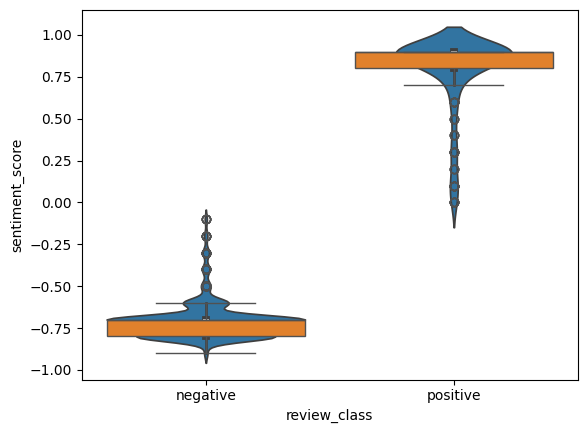

In [83]:
sns.violinplot(x='review_class', y='sentiment_score', data=df)
sns.boxplot(x='review_class', y='sentiment_score', data=df)


In [84]:
pd.crosstab(df['confidence'],df['review_class'] )

review_class,negative,positive
confidence,,
0.50,32,3
0.51,27,3
0.52,15,3
0.54,25,1
0.55,17,5
0.56,42,4
0.57,16,2
0.58,12,0
0.60,16,2


<Axes: xlabel='review_class'>

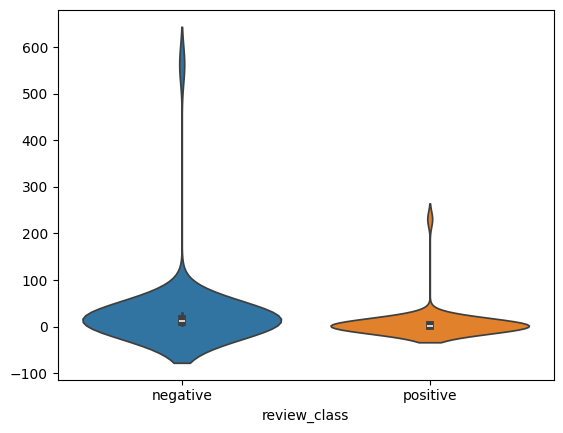

In [85]:
sns.violinplot(pd.crosstab(df['confidence'],df['review_class'] ))

<Axes: xlabel='review_class'>

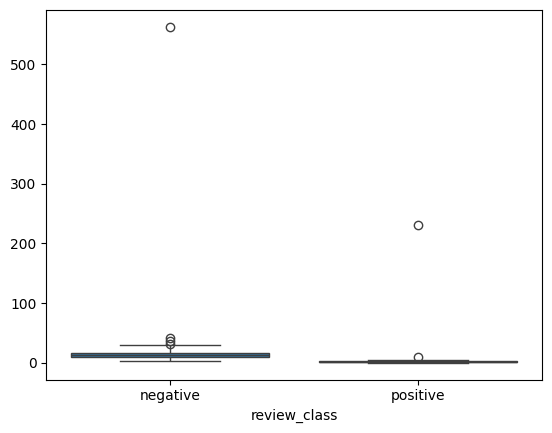

In [86]:
sns.boxplot(pd.crosstab(df['confidence'],df['review_class'] ))

<Axes: xlabel='review_class', ylabel='confidence'>

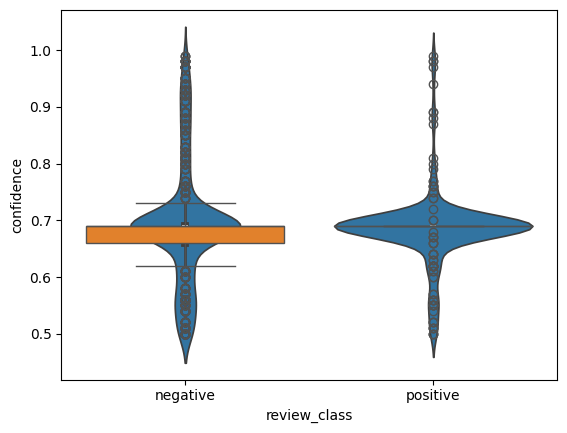

In [87]:
sns.violinplot(x='review_class', y='confidence', data=df)
sns.boxplot(x='review_class', y='confidence', data=df)


In [88]:
temp_df = df['category'].value_counts().head(6)
tempdf = df[df['category'].isin(temp_df.index)]


In [89]:
pd.crosstab(tempdf['category'], tempdf['rating'])

rating,1,2,3,4,5
category,,,,,
arts & entertainment,36,1,1,0,3
business & industrial,49,8,5,2,16
computers & electronics,64,5,2,0,12
finance,31,1,1,0,3
home & garden,53,3,1,2,5
shopping,227,11,6,5,13


<Axes: xlabel='rating'>

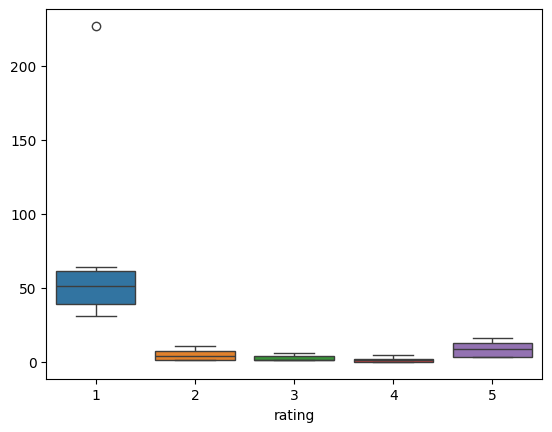

In [90]:
sns.boxplot(pd.crosstab(tempdf['category'], tempdf['rating']))

<Axes: xlabel='rating', ylabel='category'>

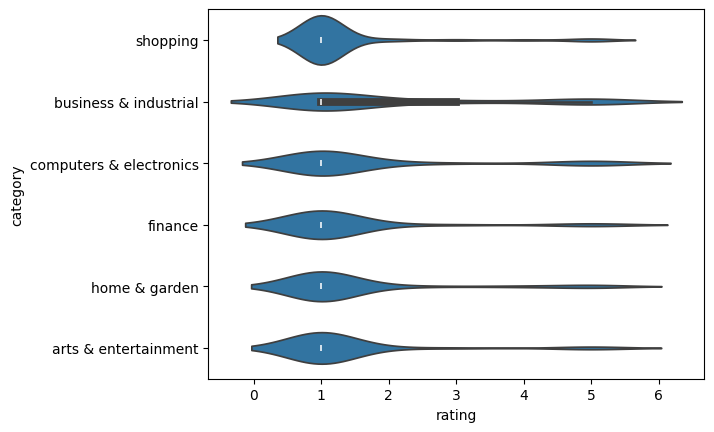

In [91]:
sns.violinplot(x='rating', y='category', data=tempdf)


<Axes: ylabel='Density'>

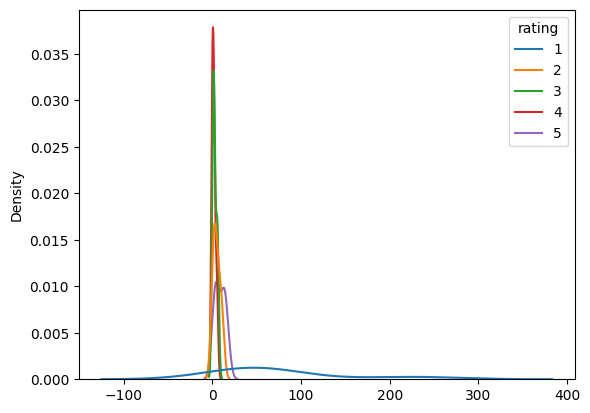

In [92]:
sns.kdeplot( pd.crosstab(tempdf['category'], tempdf['rating']))


In [93]:
df['day_name'] = df['date'].dt.day_name()

In [94]:
pd.crosstab(df['rating'], df['day_name'])

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
rating,,,,,,,
1,5,137,40,353,211,246,39
2,1,11,1,18,19,20,4
3,0,10,2,7,11,6,1
4,0,5,2,14,5,8,1
5,1,17,2,141,59,57,2


<Axes: xlabel='day_name'>

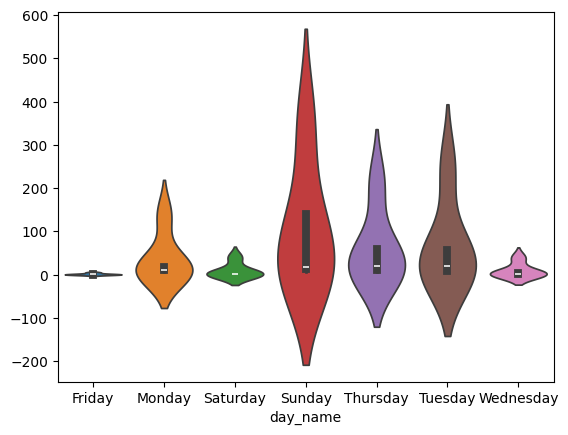

In [95]:
sns.violinplot(pd.crosstab(df['rating'], df['day_name']))

<Axes: xlabel='day_name'>

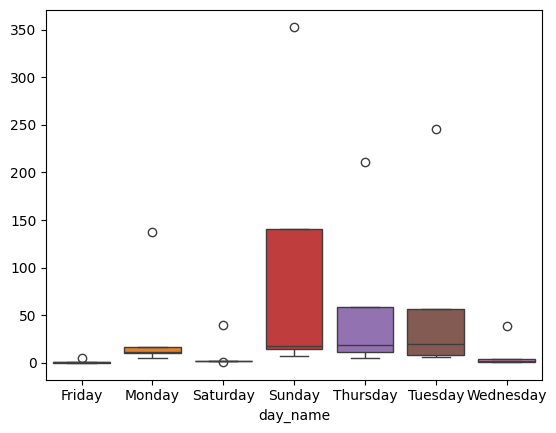

In [96]:
sns.boxplot(pd.crosstab(df['rating'], df['day_name']))

<Axes: xlabel='day_name', ylabel='rating'>

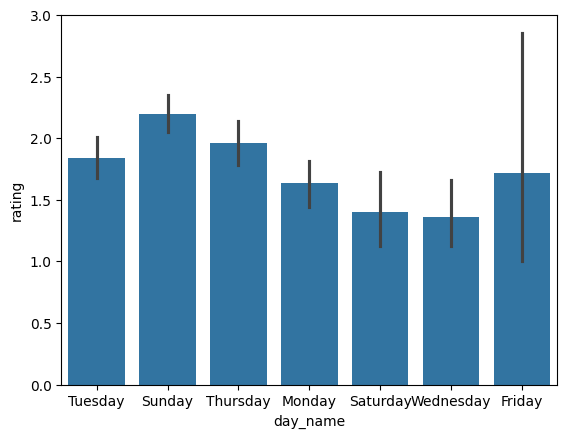

In [97]:
sns.barplot(x='day_name', y='rating', data=df)

### Numerical to Numerical

In [98]:
df['rating'].corr(df['sentiment_score'])

np.float64(0.9195790017097428)

<Axes: xlabel='rating', ylabel='sentiment_score'>

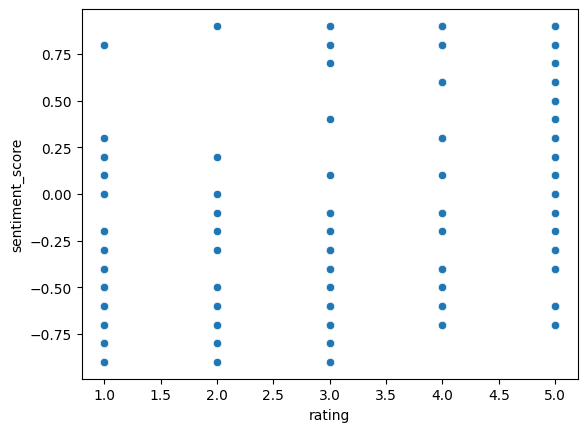

In [99]:
sns.scatterplot(x='rating', y='sentiment_score', data=df)

In [100]:
df['rating'].corr(df['confidence'])

np.float64(-0.032023280042023136)

<Axes: xlabel='rating', ylabel='confidence'>

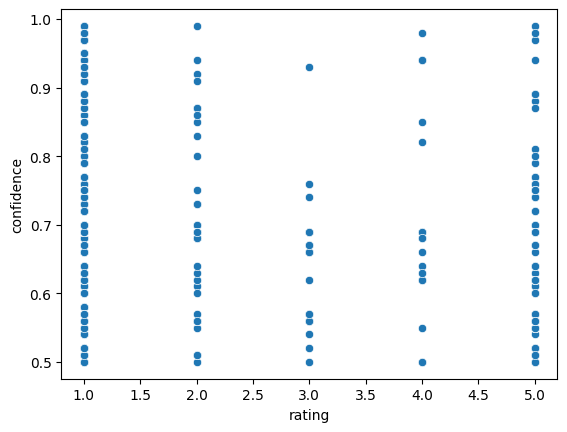

In [101]:
sns.scatterplot(x='rating', y='confidence', data=df)

In [118]:
df['date_day'] = df['date'].dt.days_in_month

0       31
1       31
2       31
3       31
4       31
        ..
1451    31
1452    31
1453    31
1454    31
1455    31
Name: date, Length: 1456, dtype: int32

In [120]:
df['sentiment_score'].corr(df['sentiment_magnitude'])

np.float64(0.0210538349657367)

In [121]:
df['sentiment_magnitude'].corr(df['confidence'])

np.float64(0.02073562509827071)

<Axes: xlabel='sentiment_magnitude', ylabel='confidence'>

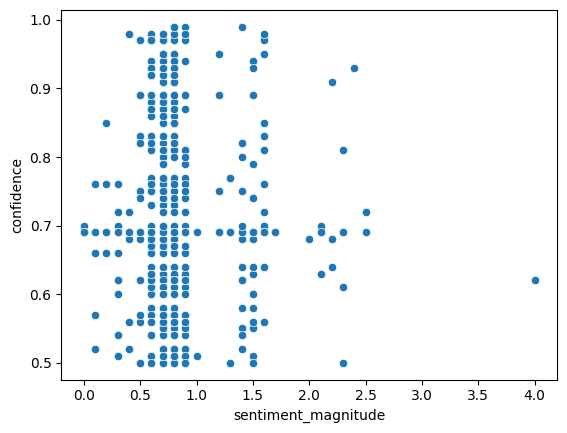

In [122]:
sns.scatterplot(x=df['sentiment_magnitude'], y=df['confidence'],data=df)

* Numerical - review , rating, date, sentiment score, sentiment magnitude, confident
* Categorical - company , country, review class, deletected lang, category
* Mixed - name , topic, content, positive class, negative class

## Advanced Enhancements to EDA

In this section, we include advanced EDA techniques to deepen the analysis: 1) Feature Engineering, 2) Improved Data Cleaning, 3) Advanced Visualizations, 4) Dimensionality Reduction using PCA, and 5) Clustering.

### Feature Engineering

In [4]:
# Extract additional features from date
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df.head()

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,...,review_class,positive_reasons,negative_reasons,detected_language,category,confidence,year,month,day,day_of_week
0,vladimiro mascaro,3.0,1,amazon,united kingdom,2024-10-01 18:25:37,4 months of total incopetence,since july until this month of all my orders 8...,-0.6,0.6,...,negative,no_positive,since july until this month of all my orders 8...,en,shopping',0.62,2024,10,1,Tuesday
1,lucy loo,9.0,1,amazon,united kingdom,2024-10-01 09:57:32,driver stealing,as a family we order from amazon almost daily ...,-0.8,0.8,...,negative,no_positive,as a family we order from amazon almost daily ...,en,NaN,NaN,2024,10,1,Tuesday
2,da,21.0,5,amazon,united kingdom,2024-10-01 11:36:09,where is the negativity coming from,probably the only store that 1 delivers ontime...,0.1,0.1,...,positive,probably the only store that 1 delivers ontime...,no_negative,en,NaN,NaN,2024,10,1,Tuesday
3,vicki study,1.0,1,amazon,united kingdom,2024-10-01 15:36:33,absolutely appalling customer service,the customer service has been absolutely appal...,-0.7,0.7,...,negative,no_positive,the customer service has been absolutely appal...,en,NaN,NaN,2024,10,1,Tuesday
4,jeffrey bruce,5.0,1,amazon,united kingdom,2024-10-01 17:09:02,amazon are quick enough to take payment,amazon are quick enough to take payment for or...,-0.7,0.7,...,negative,no_positive,amazon are quick enough to take payment for or...,en,shopping',0.62,2024,10,1,Tuesday


### Improved Data Cleaning

In [5]:
# Handling missing values - Fill missing reviews with mean
df['review'].fillna(df['review'].mean(), inplace=True)
# Handling Outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df[['review', 'sentiment_score', 'sentiment_magnitude']]))
df = df[(z_scores < 3).all(axis=1)]
df.describe()

C:\Users\gaura\AppData\Local\Temp\ipykernel_7952\2489588426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].fillna(df['review'].mean(), inplace=True)


,review,rating,date,sentiment_score,sentiment_magnitude,confidence,year,month,day
count,1416.000000,1416.000000,1416,1416.000000,1416.000000,655.000000,1416.0,1416.000000,1416.0
mean,4.633475,1.963983,2024-08-15 00:57:27.223870208,-0.383616,0.761370,0.692947,2024.0,8.437853,1.0
min,1.000000,1.000000,2024-03-01 03:27:12,-0.900000,0.000000,0.500000,2024.0,3.000000,1.0
25%,1.000000,1.000000,2024-08-01 11:13:03.750000128,-0.800000,0.700000,0.560000,2024.0,8.000000,1.0
50%,2.000000,1.000000,2024-09-01 09:37:38.500000,-0.700000,0.700000,0.670000,2024.0,9.000000,1.0
75%,5.000000,2.000000,2024-09-01 22:32:21.750000128,-0.475000,0.800000,0.810000,2024.0,9.000000,1.0
max,46.000000,5.000000,2024-10-01 23:58:33,0.900000,1.600000,0.990000,2024.0,10.000000,1.0
std,6.965984,1.611611,NaN,0.626031,0.218794,0.143693,0.0,1.474526,0.0


### Advanced Visualizations

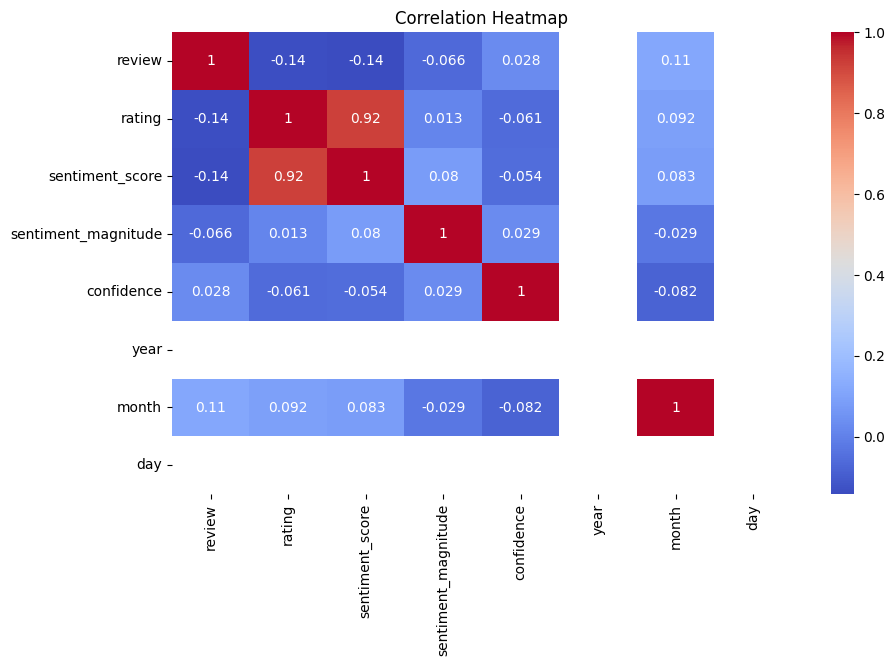

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

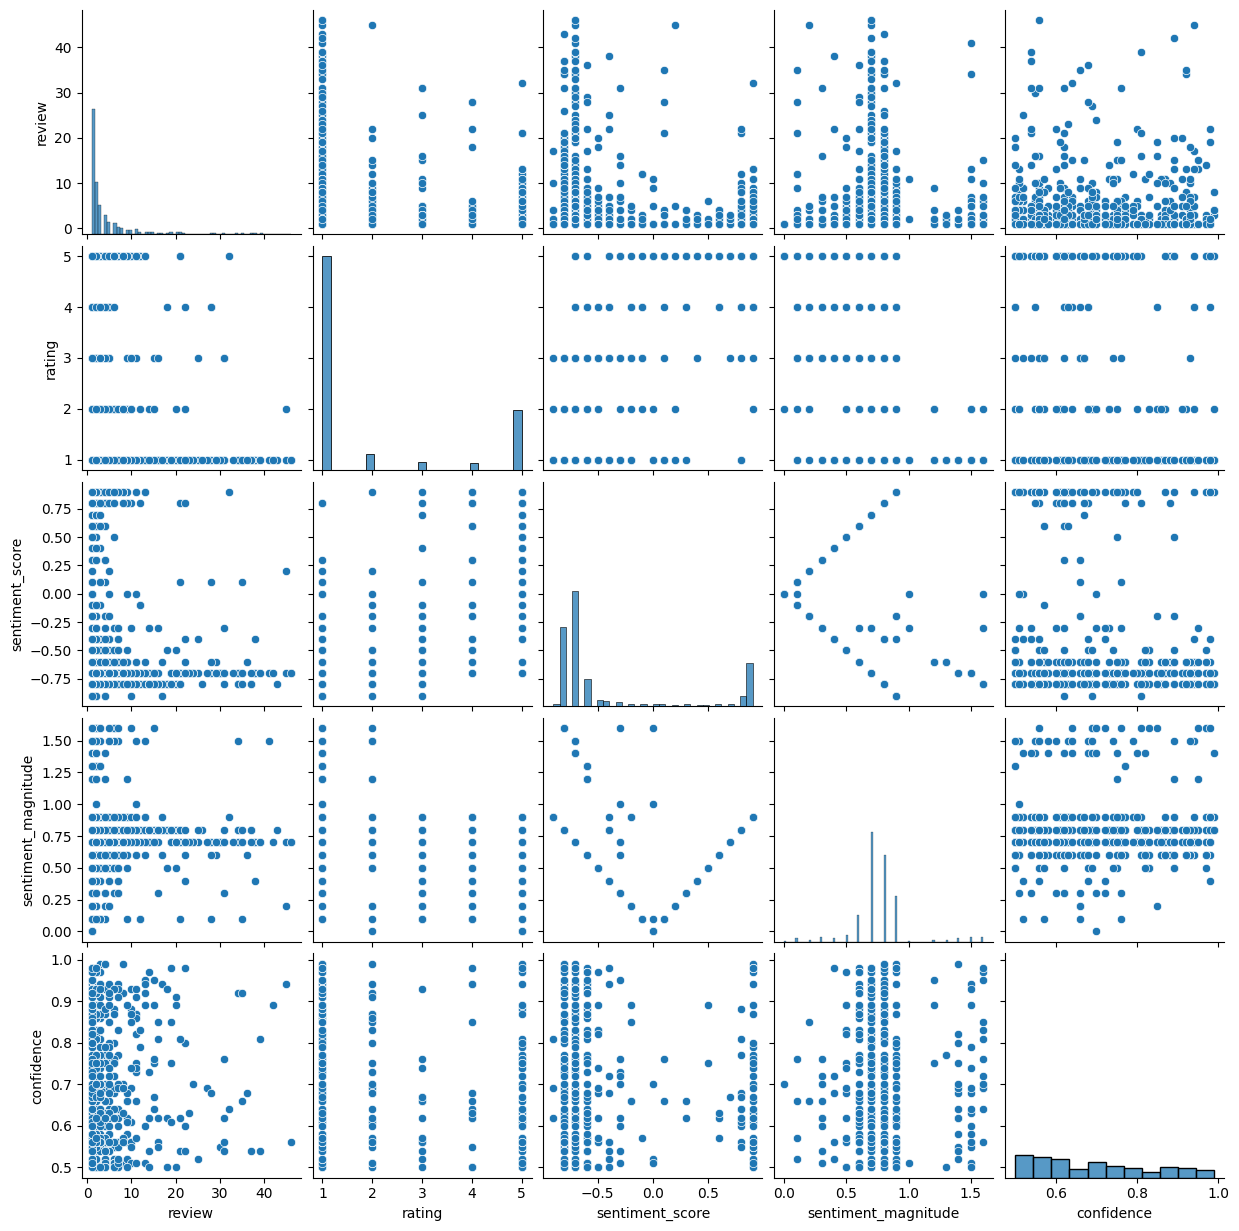

In [7]:
# Pairplot for detailed variable interaction
sns.pairplot(df[['review', 'rating', 'sentiment_score', 'sentiment_magnitude', 'confidence']])
plt.show()

### Dimensionality Reduction using PCA

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample data (replace this with your actual dataset)
data = pd.DataFrame({
    'feature1': [1.0, 2.0, None, 4.0],
    'feature2': [2.5, None, 3.5, 4.5],
    'feature3': [None, 0.5, 1.5, 3.5]
})

# Step 1: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Step 3: Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results back to a DataFrame
df = pd.DataFrame(data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

print(df)


   feature1  feature2  feature3      PCA1      PCA2
0       1.0       2.5       NaN -1.612531  0.960956
1       2.0       NaN       0.5 -0.817097 -0.975006
2       NaN       3.5       1.5 -0.156084 -0.261351
3       4.0       4.5       3.5  2.585712  0.275400


### Clustering Analysis

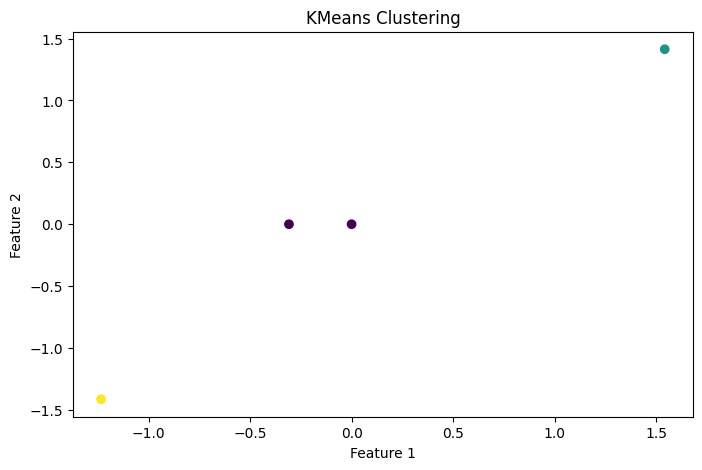

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(scaled_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(imputed_data)

# Scatter Plot of Clusters
plt.figure(figsize=(8, 5))
plt.scatter(imputed_data[:, 0], imputed_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()


## Advanced Missing Data Analysis

In [11]:
missing_data_analysis = df.isnull().sum().to_frame().rename(columns={0: 'missing_count'})
missing_data_analysis['missing_percentage'] = (missing_data_analysis['missing_count'] / len(df)) * 100
missing_data_analysis


,missing_count,missing_percentage
feature1,1,25.0
feature2,1,25.0
feature3,1,25.0
PCA1,0,0.0
PCA2,0,0.0
Cluster,0,0.0


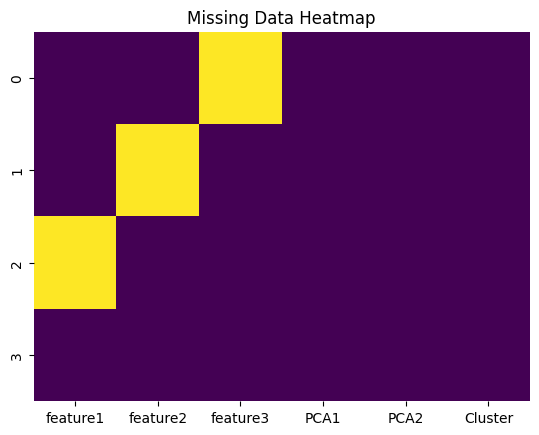

In [12]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Statistical Analysis of Numerical Features

In [13]:
from scipy.stats import skew, kurtosis
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
stats_analysis = pd.DataFrame({
    'Feature': numerical_features,
    'Mean': df[numerical_features].mean(),
    'Median': df[numerical_features].median(),
    'Skewness': df[numerical_features].apply(skew),
    'Kurtosis': df[numerical_features].apply(kurtosis)
})
stats_analysis

,Feature,Mean,Median,Skewness,Kurtosis
feature1,feature1,2.333333e+00,2.000000,NaN,NaN
feature2,feature2,3.500000e+00,3.500000,NaN,NaN
feature3,feature3,1.833333e+00,1.500000,NaN,NaN
PCA1,PCA1,0.000000e+00,-0.486590,0.796052,-0.914545
PCA2,PCA2,4.163336e-17,0.007025,-0.025430,-1.264899


## Enhanced Correlation Analysis

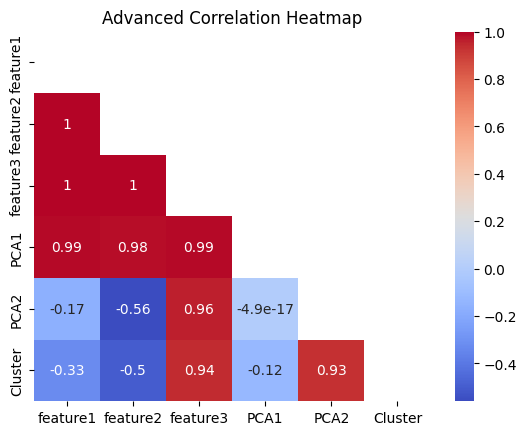

In [14]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Advanced Correlation Heatmap')
plt.show()

## Dimensionality Reduction with PCA

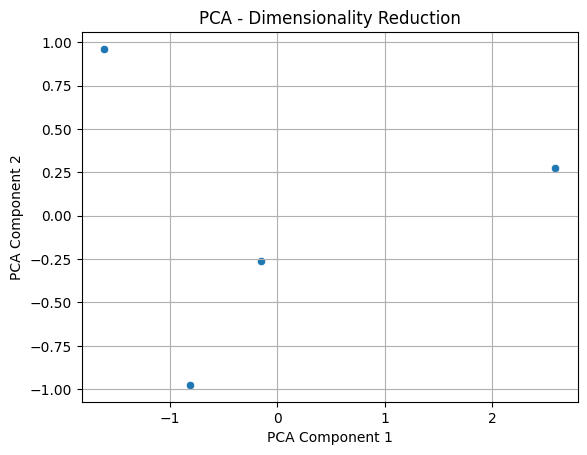

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Sample data (replace this with your actual dataset)
data = pd.DataFrame({
    'feature1': [1.0, 2.0, None, 4.0],
    'feature2': [2.5, None, 3.5, 4.5],
    'feature3': [None, 0.5, 1.5, 3.5]
})

# Step 1: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Check if there's enough data for PCA
if scaled_data.shape[0] >= 2 and scaled_data.shape[1] >= 2:
    # Step 3: Apply PCA
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(scaled_data)

    # Step 4: Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=pca_results, columns=['PCA1', 'PCA2'])

    # Step 5: Plot PCA results
    sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
    plt.title('PCA - Dimensionality Reduction')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()
else:
    print("Insufficient data after preprocessing to apply PCA. Ensure there are at least 2 samples and 2 features.")


## Clustering Analysis with KMeans

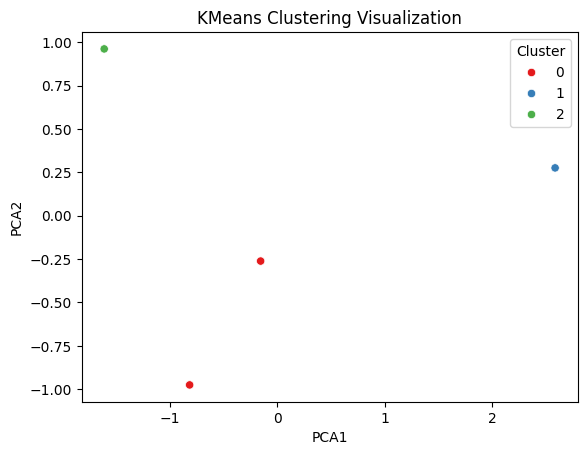

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_results)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=pca_df)
plt.title('KMeans Clustering Visualization')
plt.show()